In [1]:
# ipynb形式のライブラリのインポート
%run ./lib.ipynb

In [2]:
class ModelLin(ModelBase):
    def calc_lr(self, AllData=False):
        self.lr = LinearRegression()
        self.lr.fit(self.train_x, self.train_y)
        
    def calc_r2_score(self):
        test_y_predicted = self.lr.predict(self.test_x)
        self.r2_score = r2_score(self.test_y, test_y_predicted)
        
    def calc_mae_score(self):
        test_y_predicted = self.lr.predict(self.test_x)
        self.mae_score = mean_absolute_error(self.test_y, test_y_predicted)
        
    def calc_mse_score(self):
        test_y_predicted = self.lr.predict(self.test_x)
        self.mse_score = mean_squared_error(self.test_y, test_y_predicted)
        
    def calc_rmse_score(self):
        self.calc_mse_score()
        self.rmse_score = np.sqrt(self.mse_score)
        
    def calc_mape_score(self):
        test_y_predicted = self.lr.predict(self.test_x)
        self.mape_score = float(mape_score(self.test_y, test_y_predicted))

    def calc_mape_score_InTrain(self):
        train_y_predicted = self.lr.predict(self.train_x)
        self.mape_score_InTrain = float(mape_score(self.train_y, train_y_predicted))
        
    def plot_graph(self, save=False, fileName="graph.pdf"):
        plt.figure()
        plt.scatter(self.raw_x, self.raw_y)
        self.y_model_line = self.lr.predict(self.x_model_line)
        plt.plot(self.x_model_line, self.y_model_line, color="red")
        plt.xlabel(self.xlabel)
        plt.ylabel(self.ylabel)
        if(save):
            plt.savefig(fileName)
        
    def predict(self, num):
        predicted = self.lr.predict(num)
        return(predicted)
    
    def ModelName(self):
        return("ModelLin")

In [ ]:
def split_by_ratio(base_list :list, test_ratio :float):
    test_index = math.floor(len(base_list) * float(test_ratio))
    train_list = base_list[:-test_index]
    test_list = base_list[-test_index:]
    if(test_ratio == 0):
        return base_list, []
    return train_list, test_list

class ModelBase:
    def __init__(self, raw_x, raw_y, benchmark_name="benchmark_name", function_name="function_name", test_ratio=0.3):
        self.benchmark_name = benchmark_name
        self.function_name = function_name
        self.xlabel = "実行時のプロセス数"
        self.ylabel = "プロセスごとの関数コール回数"

        self.raw_x = np.reshape(raw_x, (-1, 1))
        self.raw_y = np.reshape(raw_y, (-1, 1))
        self.train_x, self.test_x = split_by_ratio(self.raw_x, test_ratio)
        self.train_y, self.test_y = split_by_ratio(self.raw_y, test_ratio)
        
        if(len(self.train_x) == len(self.test_x) or len(self.train_y) == len(self.test_y)):
            print(f"学習用とテスト用にデータを分割するのに問題が生じています。@{benchmark_name}")
            print(f"len(self.train_x) == {len(self.train_x)}")
            print(f"len(self.train_y) ==  {len(self.train_y)}")
            print(f"len(self.test_x) == {len(self.test_x)}")
            print(f"len(self.test_y) == {len(self.test_y)}")
        
        self.x_model_line = np.reshape(np.arange(start=0.1, stop=self.raw_x.max(), step=0.1), (-1, 1))
        self.y_model_line = 0
        
        self.lr = 0
        self.r2_score = 0
        
    def calc_lr(self):
        self.lr = 0
     
    def calc_r2_score(self):
        self.r2_score = 0
        
    def calc_mae_score(self):
        self.mae_score = 0
        
    def calc_mse_score(self):
        self.mse_score = 0
        
    def calc_rmse_score(self):
        self.rmse_score = 0
    
    def calc_mape_score(self):
        self.mape_score = 0
        
    def plot_graph(self):
        plt.figure()
        plt.plot(self.raw_x, self.raw_y, color="red")
        plt.show()
        

# 線形モデルでロバスト回帰を行う
class ModelLin_rob(ModelBase):
    def calc_lr(self, AllData=False):
        self.lr = LinearRegression()
        self.lr.fit(self.train_x, self.train_y)
        
    def calc_mape_score(self):
        test_y_predicted = self.lr.predict(self.test_x)
        self.mape_score = float(mape_score(self.test_y, test_y_predicted))

    def calc_mape_score_InTrain(self):
        train_y_predicted = self.lr.predict(self.train_x)
        self.mape_score_InTrain = float(mape_score(self.train_y, train_y_predicted))
        
    def predict(self, num):
        predicted = self.lr.predict(num)
        return(predicted)
    
    def ModelName(self):
        return("ModelLin_rob")

{'bt': ['EXACT_SOLUTION'],
 'cg': ['MPI_Irecv()'],
 'ep': [],
 'ft': ['CFFTZ', 'FFTZ2', 'SET_CLASS'],
 'is': ['MPI_Irecv()', 'double_randlc(double_*_double_*)'],
 'lu': ['BLTS', 'EXCHANGE_6'],
 'mg': ['BUBBLE', 'ZERO3'],
 'sp': ['EXACT_SOLUTION']}

<Figure size 2000x2000 with 0 Axes>

___________________"ft"_____"CFFTZ"___________________


,1,2,4,8,16,32,64,128,256
Name,,,,,,,,,
CFFTZ,2048.0,225280.0,112640.0,56320.0,28160.0,14080.0,7040.0,3520.0,1760.0


array([[  1],
       [  2],
       [  4],
       [  8],
       [ 16],
       [ 32],
       [ 64],
       [128],
       [256]])

array([[  1],
       [  2],
       [  4],
       [  8],
       [ 16],
       [ 32],
       [ 64],
       [128]])

array([256])

array([[  2048.],
       [225280.],
       [112640.],
       [ 56320.],
       [ 28160.],
       [ 14080.],
       [  7040.],
       [  3520.],
       [  1760.]])

array([[  2048.],
       [225280.],
       [112640.],
       [ 56320.],
       [ 28160.],
       [ 14080.],
       [  7040.],
       [  3520.]])

array([1760.])

TypeError: __init__() missing 2 required positional arguments: 'raw_x' and 'raw_y'

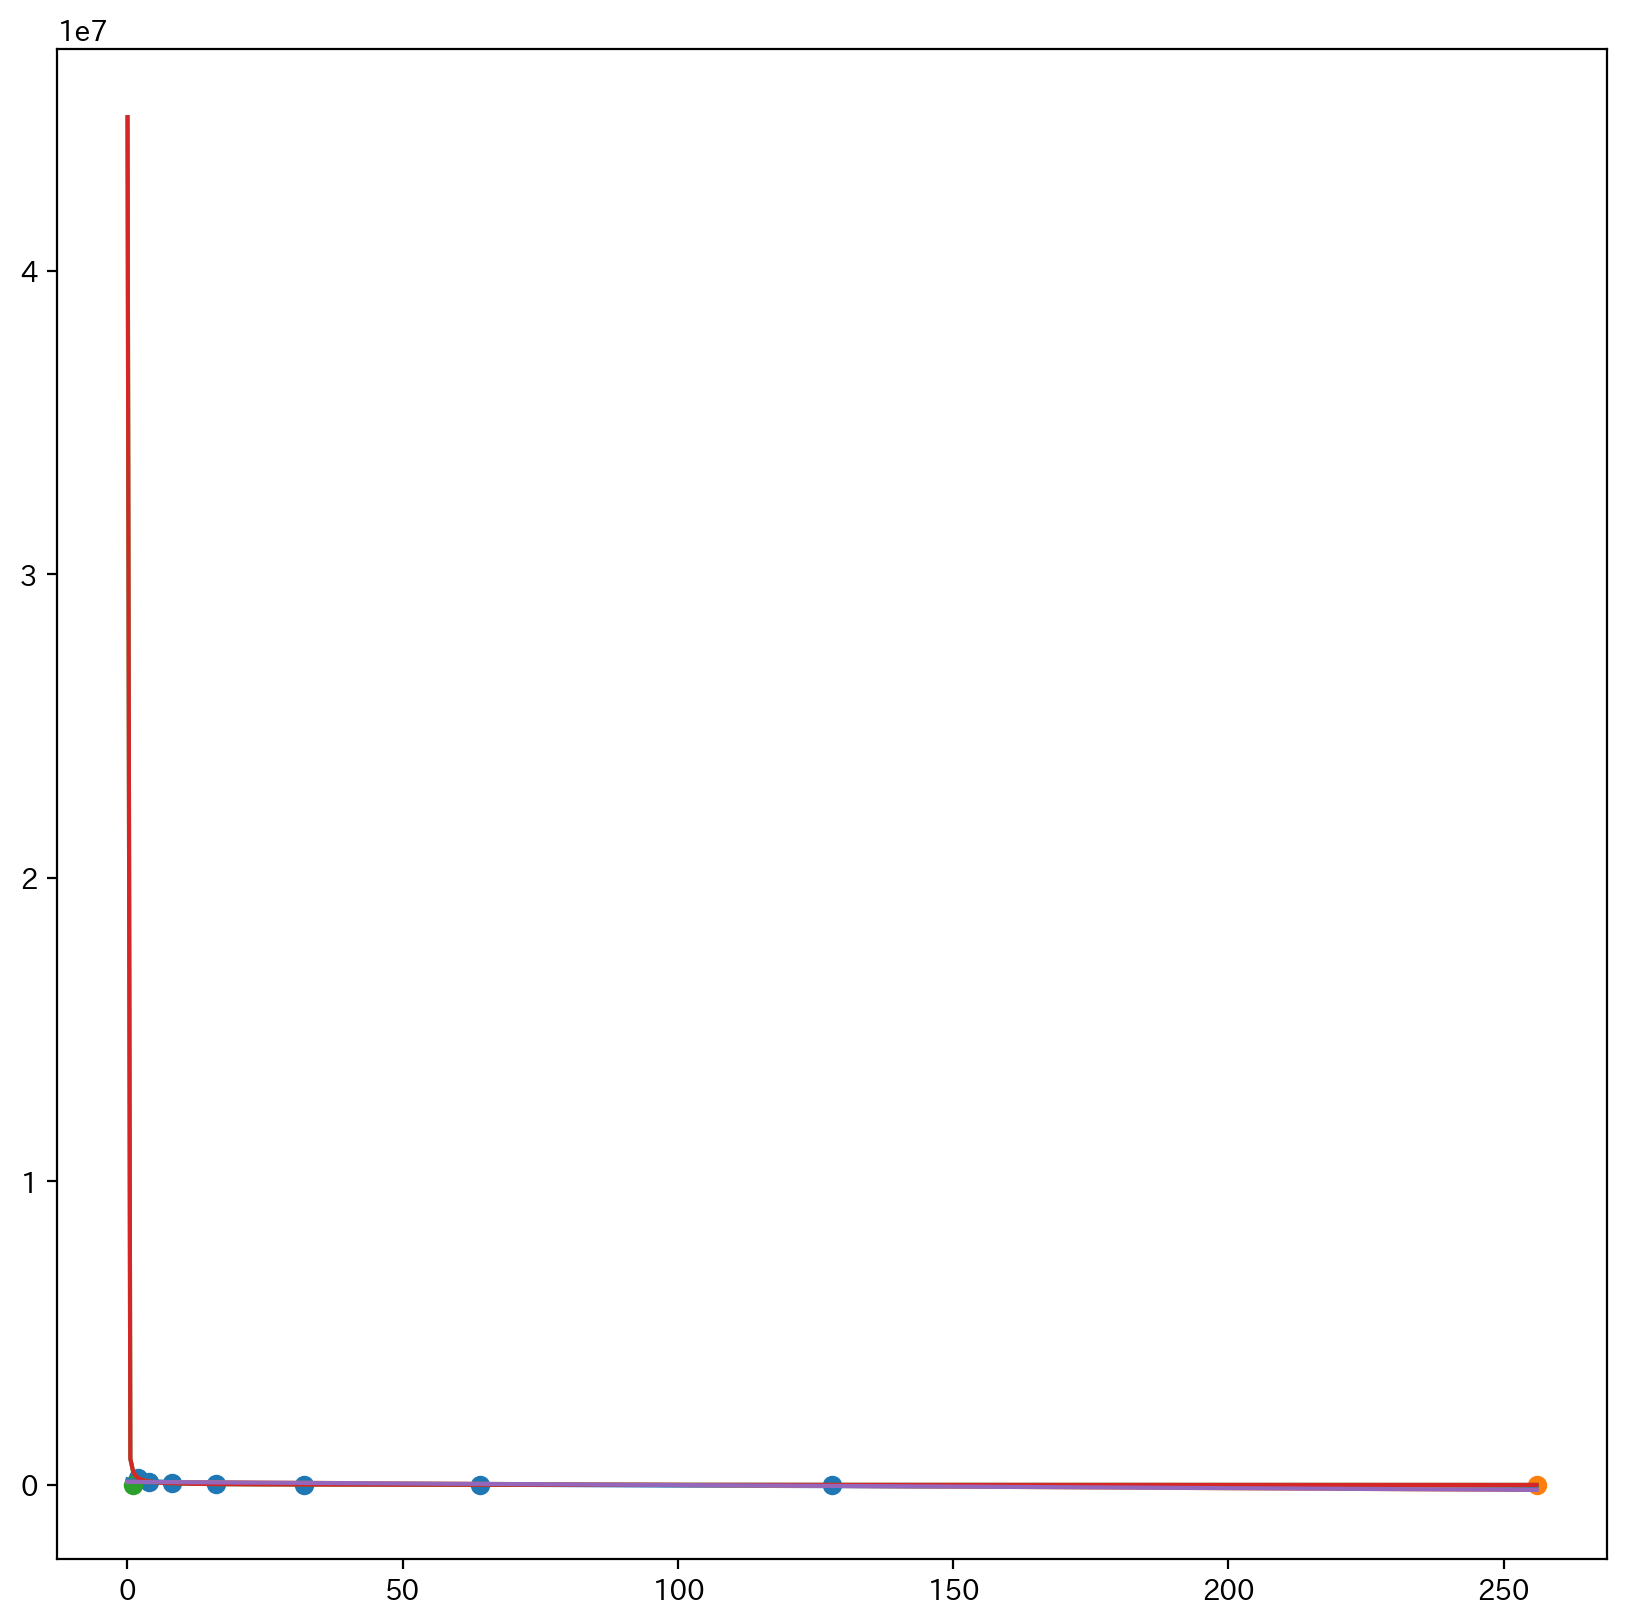

In [5]:
FixedClassDict = {}
for benchmark in benchmarks:
    targetDF = return_ErrorRateFixedClassDF(benchmark=benchmark, FixClass="B", predict_process=256)
    columns = targetDF.columns.tolist()
    # 平均絶対誤差率が0.1より大きいものを抽出
    targetDF = targetDF[targetDF[columns[0]] > 0.1]
    # データが同じことに由来する重複を削除
    targetDF = targetDF[~targetDF.duplicated()]
    targetFunctionNameList = targetDF.index.tolist()
    FixedClassDict[benchmark] = targetFunctionNameList
FixedClassDict

# Extra-Pへの入力ファイルを生成
funcCallNumDict = {}
for benchmarkName in FixedClassDict:
    if benchmarkName == "bt" or benchmarkName == "sp" :
        _processes = process_onlyBTSP
    else:
        _processes = process_excludeBTSP
    funcCallNumDict[benchmarkName] = {}
    for functionName in FixedClassDict[benchmarkName]:
        funcCallNumDict[benchmarkName][functionName] = returnRawDF(Benchmark = benchmarkName, functionName = functionName, fix="Class", Processes = _processes, FixedBenchmarkClass="B")
#         generateInputFileForExtraP(funcCallNumDict[benchmarkName][functionName], repeated=3, includeLastData = False, fileName = f"tmp_{benchmarkName}_{functionName}.txt")

plt.figure(figsize=(10,10),dpi=200)


# ベンチマーク名と関数名の指定
benchmarkName = "ft"
functionName = "CFFTZ"
print(f"___________________\"{benchmarkName}\"_____\"{functionName}\"___________________")

# 実データの取り出し
functionDF = funcCallNumDict[benchmarkName][functionName]
functionDF
raw_x = functionDF.columns.tolist()
raw_y = [functionDF.at[functionName, x] for x in raw_x]

# Extra-P用の入力データの作成
generateInputFileForExtraPfromLists(input_x=raw_x, input_y=raw_y, repeated=3, includeFirstData=False, includeLastData=False, fileName =f"tmp_{benchmarkName}_{functionName}.txt")
raw_x = np.array(raw_x).reshape(-1,1)
raw_y = np.array(raw_y).reshape(-1, 1)
# Extra-PでfixProcessデータを入力して出力したモデルの図示
plot_x = np.linspace(0.01, 256, 500)
# 下記はExtra-Pで出力されたモデル
# 192658.33552658802 + -46041.48912003825 * p^(1/3)
plot_y = []
plot_y = [192658.33552658802 + -46041.48912003825 * x**(1/3) for x in plot_x]
plt.plot(plot_x, plot_y, label="ExtraP")

# 説明変数と目的変数に分割
notTrain_x, train_x, target_x = raw_x[0], raw_x[1:-1], raw_x[-1]
notTrain_y, train_y, target_y = raw_y[0], raw_y[1:-1], raw_y[-1]

plt.scatter(train_x, train_y, marker="o", label="予測に用いた関数コール回数")
plt.scatter(target_x, target_y, marker="o", label="予測したい関数コール回数の実測値")
plt.scatter(notTrain_x, notTrain_y, marker="o", label="予測に用いなかった関数コール回数")

# モデル式をプロットするために変数”plot_x”に対して変換を実施
plot_x = np.array(plot_x).reshape(-1, 1)

# 線形モデル
model_lin = ModelLin(train_x, train_y, benchmarkName, functionName, test_ratio=0)
model_lin.calc_lr()
plot_y_lin = model_lin.predict(plot_x)
plt.plot(plot_x, plot_y_lin, label="線形モデル(最初のデータを除外)")
# 対数モデル
model_log10 = ModelLog10(train_x, train_y, benchmarkName, functionName, test_ratio=0)
model_log10.calc_lr()
plot_y_log10 = model_log10.predict(plot_x)
plt.plot(plot_x, plot_y_log10, label="対数モデル(最初のデータを除外)")
# 反比例モデル
model_ip = ModelIP(train_x, train_y, benchmarkName, functionName, test_ratio=0)
model_ip.calc_lr()
plot_y_ip = model_ip.predict(plot_x)
plt.plot(plot_x, plot_y_ip, label="反比例モデル(最初のデータを除外)")
# 線形飽和モデル
model_branch = ModelBranch(train_x, train_y, benchmarkName, functionName, test_ratio=0)
model_branch.calc_lr()
plot_y_branch = model_branch.predict(plot_x)
plt.plot(plot_x, plot_y_branch, label="線形飽和モデル(最初のデータを除外)")

# 最初のデータを含む学習データと最後のデータのみの試験用データに分割
train_x, target_x = raw_x[:-1], raw_x[-1]
train_y, target_y = raw_y[:-1], raw_y[-1]
raw_x
train_x
target_x
raw_y
train_y
target_y

# 線形モデル(ロバスト回帰)
model_lin_rob = ModelLin_rob()

# 凡例の表示
plt.legend()
# 軸ラベルの設定
plt.ylabel("関数コール回数")
plt.xlabel("実行コア数")
# 軸の対数軸化
# plt.xscale('log')
plt.yscale('log')